# Ford GoBike Trip Duration per User Type, Age, and Gender
## by Shahad Al-Khalifa

## Investigation Overview


> In this presentation, we wanted to investigate the duration of trips and how it changes with respect to the user type, age, and gender. Thus, three factor will be investigated the user type (Customer or Subscriber), gender (male, female, or other), and age.

## Dataset Overview

> The dataset has 183412 bike rides that happened in the San Francisco Bay Area. The dataset has 16 features, some of them are:
- `duration_sec`: The duration of the trip in seconds.
- `start_time` and `end_time` for the bike rides.
- `start_station_name` and `end_station_name`, as well as latitude and longitude.
- `user_type` of either a subscriber or a customer.
- Some information of the members such as their gender and birth year.

> After my modifications the dataset has 174880 bike rides and 21 features. The added features are the `age`, `start_date`, `end_date`, `start_day`, and `end_day`, since I want to investigate them further.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('df_clean.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_date,end_date,start_day,end_day,age
0,52185,17:32:10.145000,08:01:55.975000,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13,Commercial St at Montgomery St,37.794231,...,4902,Customer,1984.0,Male,False,2019-02-28,2019-03-01,Thursday,Friday,35
1,61854,12:13:13.218000,05:24:08.146000,86,Market St at Dolores St,37.769305,-122.426826,3,Powell St BART Station (Market St at 4th St),37.786375,...,5905,Customer,1972.0,Male,False,2019-02-28,2019-03-01,Thursday,Friday,47
2,36490,17:54:26.010000,04:02:36.842000,375,Grove St at Masonic Ave,37.774836,-122.446546,70,Central Ave at Fell St,37.773311,...,6638,Subscriber,1989.0,Other,False,2019-02-28,2019-03-01,Thursday,Friday,30
3,1585,23:54:18.549000,00:20:44.074000,7,Frank H Ogawa Plaza,37.804562,-122.271738,222,10th Ave at E 15th St,37.792714,...,4898,Subscriber,1974.0,Male,True,2019-02-28,2019-03-01,Thursday,Friday,45
4,1793,23:49:58.632000,00:19:51.760000,93,4th St at Mission Bay Blvd S,37.770407,-122.391198,323,Broadway at Kearny,37.798014,...,5200,Subscriber,1959.0,Male,False,2019-02-28,2019-03-01,Thursday,Friday,60


## Average Trip Duration Based on User Type

> The average trip duration of users is longer for customers in comparison to subscribers.

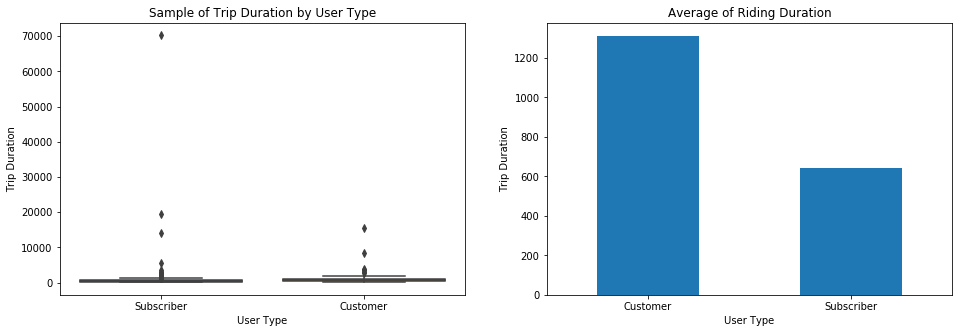

In [3]:
fig, ax = plt.subplots(1, 2, figsize = [16, 5])

# Take a sample of data
sample = df.sample(1000)

ax[0].set_title('Sample of Trip Duration by User Type')
plot = sb.boxplot(data = sample, x = 'user_type', y = 'duration_sec', ax = ax[0])
plot.set_ylabel('Trip Duration')
plot.set_xlabel('User Type')


duration_user = df[['user_type', 'duration_sec']].groupby('user_type').mean()
duration_user.plot(kind = 'bar', ax = ax[1], legend = None, rot = 0)
ax[1].set_title("Average of Riding Duration")
ax[1].set_ylabel("Trip Duration")
ax[1].set_xlabel('User Type')

plt.show()

## Average Trip Duration Based on User Age

> The majority of users are aged between 20 and 40 and their average trip durations are below 2000 sec (10 minutes).

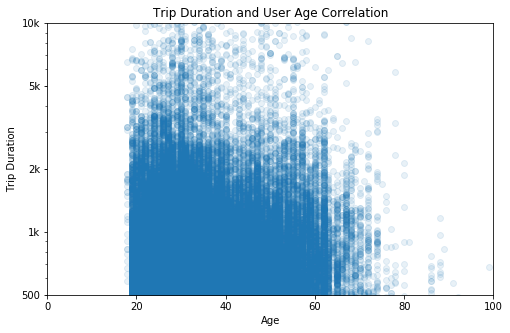

In [4]:
# scatter plot of trip duration vs. users' age, with log transform on trip duration axis

plt.figure(figsize = [8, 5])
plt.scatter(df['age'], df['duration_sec'], alpha = 1/10)
plt.xlim([0, 100])
plt.ylim([500, 10000])
plt.xlabel('Age')
plt.yscale('log')
plt.yticks([500, 1e3, 2e3, 5e3, 1e4], [500, '1k', '2k', '5k', '10k'])
plt.ylabel('Trip Duration')
plt.title('Trip Duration and User Age Correlation')

plt.show()

## Average Trip Duration Based on User Gender
> The trip duration of female users is more than male users with an average of 779 seconds, wheras male users have an average of 672 seconds of trip durations. However, Other gender tops male and female with the trip duration frequency having an average of 997 seconds.

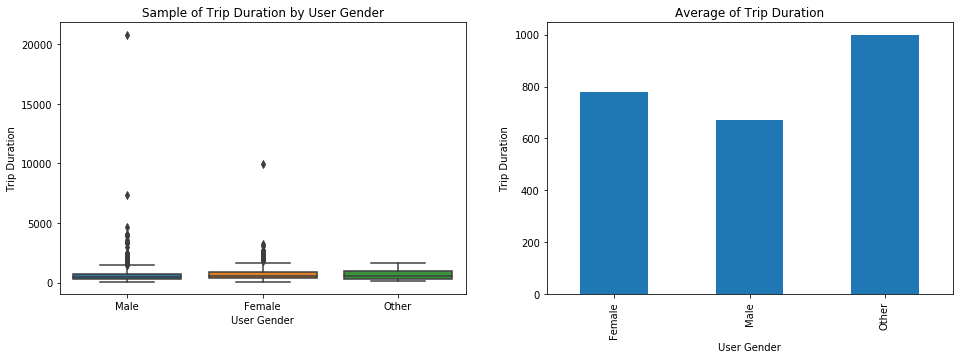

In [5]:
# Create a sample of 1000 data points
sample = df.sample(1000)

# Create a figure with 2 subplots
fig, ax = plt.subplots(1, 2, figsize=(16, 5))

# Plot the first boxplot in the first subplot
ax[0].set_title('Sample of Trip Duration by User Gender')
sb.boxplot(data = sample, x = 'member_gender', y = 'duration_sec', ax=ax[0])
ax[0].set_ylabel('Trip Duration')
ax[0].set_xlabel('User Gender')

# Plot the second bar chart in the second subplot
duration_gender = df[['member_gender', 'duration_sec']].groupby('member_gender').mean()
duration_gender.plot(kind = 'bar', ax=ax[1], legend= None)
ax[1].set_title("Average of Trip Duration")
ax[1].set_ylabel("Trip Duration")
ax[1].set_xlabel('User Gender')

# Show the figure
plt.show()

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck_template.ipynb to slides
[NbConvertApp] Writing 447157 bytes to Part_II_slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_slide_deck_template.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: google-chrome: not found
/usr/bin/xdg-open: 778: /usr/bin/

> In the classroom workspace, the generated HTML slideshow will be placed in the home folder. 

> In local machines, the command above should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 

### Submission
If you are using classroom workspace, you can choose from the following two ways of submission:

1. **Submit from the workspace**. Make sure you have removed the example project from the /home/workspace directory. You must submit the following files:
   - Part_I_notebook.ipynb
   - Part_I_notebook.html or pdf
   - Part_II_notebook.ipynb
   - Part_I_slides.html
   - README.md
   - dataset (optional)


2. **Submit a zip file on the last page of this project lesson**. In this case, open the Jupyter terminal and run the command below to generate a ZIP file. 
```bash
zip -r my_project.zip .
```
The command abobve will ZIP every file present in your /home/workspace directory. Next, you can download the zip to your local, and follow the instructions on the last page of this project lesson.
